In [1]:
# K-means Clustering using scikit-learn first
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# create a synthetic dataset
n = 12
k = 3
X, _ = make_blobs(n_samples = n, n_features = 2, centers = k, random_state = 42)

# Make blobs

# make_blobs is a function from scikit-learn (sklearn.datasets) used to generate
# synthetic datasets for clustering or classification, especially useful when
# testing algorithms like k-means or other unsupervised methods.

# Parameters (most common ones):
# n_samples: Total number of data points (int or list of ints).
# centers: Number of clusters or specific center coordinates.
# n_features: Number of features (dimensions).
# cluster_std: Standard deviation of each cluster.
# random_state: Ensures reproducibility.
X

array([[-8.03062077, -6.50441157],
       [-6.81209899, -8.30485778],
       [ 2.914961  ,  1.41088215],
       [-7.42400992, -6.769187  ],
       [-2.97867201,  9.55684617],
       [-7.48026588, -7.17180334],
       [-0.92998481,  9.78172086],
       [ 3.62704772,  2.28741702],
       [-2.97261532,  8.54855637],
       [ 6.10552761,  1.74739338],
       [ 3.73185476,  0.56086598],
       [-2.26723535,  7.10100588]])

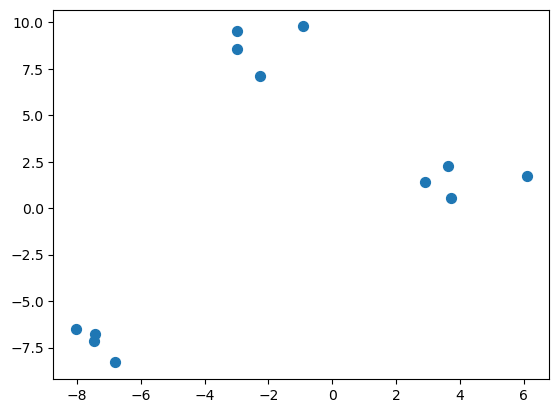

In [2]:
plt.scatter(X[:,0], X[:,1], s=50); # s is size

In [3]:
# use sklearn Kmeans
from sklearn.cluster import KMeans

# trying a few different k (start with 2, because there's no point in doing 1)
# n_init tells sklearn how many different starting values to use (so, if you
# only want to run k-means once, make n_init=1). And, in case it is taking too
# long for the algorithm to converge, you can set the max_iter as well (default,
# we we'll use, is 300)
kmeans2 = KMeans(n_clusters=2, n_init=1)
kmeans3 = KMeans(n_clusters=3, n_init=1)
kmeans4 = KMeans(n_clusters=4, n_init=1)
kmeans5 = KMeans(n_clusters=5, n_init=1)
kmeans6 = KMeans(n_clusters=6, n_init=1)
kmeans7 = KMeans(n_clusters=7, n_init=1)

# The lines above create an object — specifically,
# an instance of the KMeans class from sklearn.cluster.

# kmeans2.fit(X) means you're training (or "fitting")
# your kmeans2 object on the dataset X. And similarly for the
# other kmeans commands

kmeans2.fit(X)
kmeans3.fit(X)
kmeans4.fit(X)
kmeans5.fit(X)
kmeans6.fit(X)
kmeans7.fit(X)

,n_clusters,7
,init,'k-means++'
,n_init,1
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


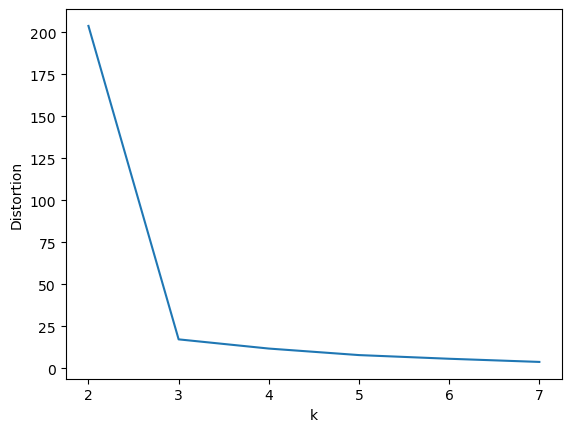

In [4]:
# store the Distortion scores
Distortion_scores = [kmeans2.inertia_, kmeans3.inertia_,
                     kmeans4.inertia_, kmeans5.inertia_,
                     kmeans6.inertia_, kmeans7.inertia_]
plt.plot(list(range(2, 8)), Distortion_scores)
plt.xlabel('k')
plt.ylabel('Distortion');

# # kmeans2.inertia_ means you're training (or "fitting")
# your kmeans2 object on the dataset X.
# The underscore _ means that this value was computed or
# learned during .fit() — not set at initialization.

# Lower inertia means tighter clusters — a good thing, generally.

In [5]:
# Seems obvious (as it should) that 3 is best
labels = kmeans3.labels_
# grabs the cluster label for each data point after fitting with kmeans3 object.
centers = kmeans3.cluster_centers_

print(labels)
print(centers)

[1 1 0 1 2 1 2 0 2 0 0 2]
[[ 4.09484777  1.50163963]
 [-7.43674889 -7.18756493]
 [-2.28712687  8.74703232]]


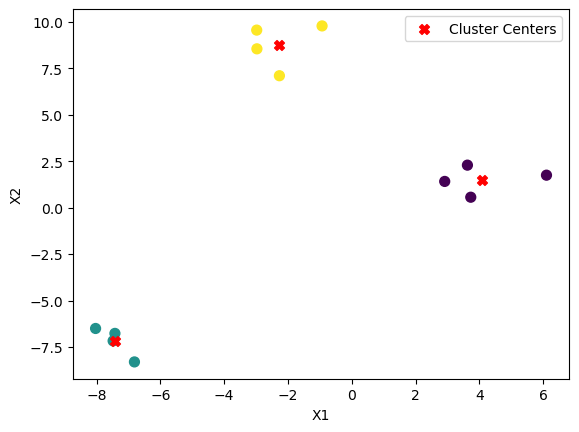

In [6]:
plt.scatter(X[:,0], X[:,1], s=50, c=labels, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=50, label='Cluster Centers')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()
# Notice that there are three classes, and that the their labels are 0, 1, and 2.
# Notice that there are also three centroids. Their x and y components are centers[:,0] and
# centers[:,1]

In [7]:
# try it with real data from our classroom dataset
# (and also code up our own algorithm)
import pandas as pd

gtky = pd.read_csv('ds4400_clean_gtky.csv')
gtky.head()

,class,cs_ds,co_op,credit_hours,work_hours
0,Senior,DS,Yes,17,12
1,Sophomore,CS,No,17,0
2,Senior,DS,No,17,15
3,Senior,CS,Yes,16,3
4,Junior,CS,No,16,0


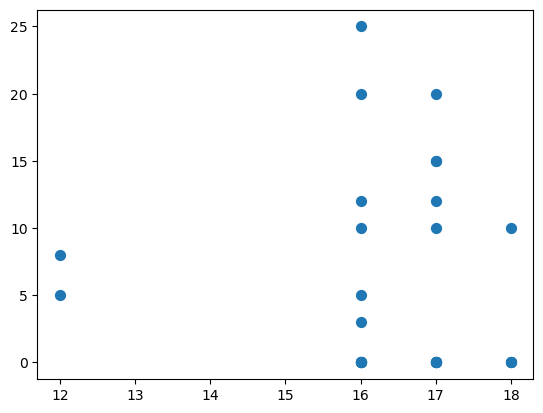

In [8]:
X_gtky = gtky[['credit_hours', 'work_hours']].to_numpy()
# grabbing credit_jours and work_hours columns only
# maybe not immediately clear what the clusters might be...
plt.scatter(X_gtky[:,0], X_gtky[:,1], s=50);

In [9]:
# since we are using distance measure, should scale to be safe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X_gtky).round(2)
X_scale[:5,:]

array([[0.83, 0.48],
       [0.83, 0.  ],
       [0.83, 0.6 ],
       [0.67, 0.12],
       [0.67, 0.  ]])

In [10]:
gkmeans2 = KMeans(n_clusters=3, n_init=100)
gkmeans3 = KMeans(n_clusters=3, n_init=100)
gkmeans4 = KMeans(n_clusters=4, n_init=100)
gkmeans5 = KMeans(n_clusters=5, n_init=100)
gkmeans6 = KMeans(n_clusters=6, n_init=100)
gkmeans7 = KMeans(n_clusters=7, n_init=100)

gkmeans2.fit(X_scale)
gkmeans3.fit(X_scale)
gkmeans4.fit(X_scale)
gkmeans5.fit(X_scale)
gkmeans6.fit(X_scale)
gkmeans7.fit(X_scale)

,n_clusters,7
,init,'k-means++'
,n_init,100
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [11]:
# # write k-means algorithm function
# # then test it on k=2, 3, 4, 5, 6, 7
# # choose the best k and then print out the cluster assigments
# # do they seem to match up with any of the categorical features?
# def kmeans(X, k, max_iter=None):
#     '''
#         performs kmeans

#         args:
#             X: the data matrix
#             k: the number of clusters
#             max_iter: the maximum number of iterations to run (default None)

#         returns:
#             kmeans_dict: a dictionary with
#                 - centroids: the final cluster centers
#                 - labels: the final cluster labels
#                 - distortion: the distortion value for the final labels
#     '''

In [12]:
# try it on the first simulated data (should look the same)
test = gkmeans3
test

,n_clusters,3
,init,'k-means++'
,n_init,100
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [13]:
# Seems obvious (as it should) that 3 is best
labels = gkmeans3.labels_
# grabs the cluster label for each data point after fitting with kmeans3 object.
centers = gkmeans3.cluster_centers_

print(labels)
print(centers)

[1 0 1 0 0 0 2 1 2 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0]
[[0.78933333 0.02133333]
 [0.783      0.596     ]
 [0.         0.26      ]]


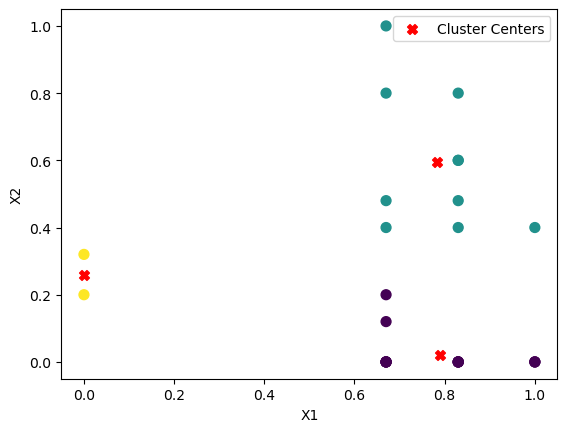

In [14]:
plt.scatter(X_scale[:,0], X_scale[:,1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:,0], centers[:,1], c='red', marker='X', s=50, label='Cluster Centers')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [15]:
# # now try it on the GTKY data (not sure how long convergence will take, so PoC with max_iter = 100)
# gtky2 = kmeans(X_scale, k=2, max_iter=100)
# gtky3 = kmeans(X_scale, k=3, max_iter=100)
# gtky4 = kmeans(X_scale, k=4, max_iter=100)
# gtky5 = kmeans(X_scale, k=5, max_iter=100)
# gtky6 = kmeans(X_scale, k=6, max_iter=100)
# gtky7 = kmeans(X_scale, k=7, max_iter=100)

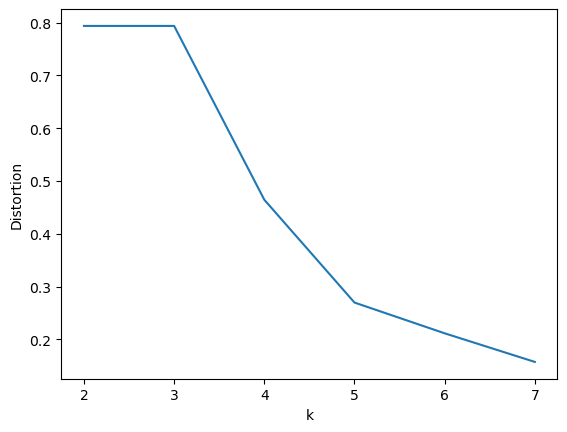

In [16]:
# store the Distortion scores
Distortion_scores = [gkmeans2.inertia_, gkmeans3.inertia_,
                     gkmeans4.inertia_, gkmeans5.inertia_,
                     gkmeans6.inertia_, gkmeans7.inertia_]
plt.plot(list(range(2, 8)), Distortion_scores)
plt.xlabel('k')
plt.ylabel('Distortion');

In [17]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=k)
labels = agg_clustering.fit_predict(X)

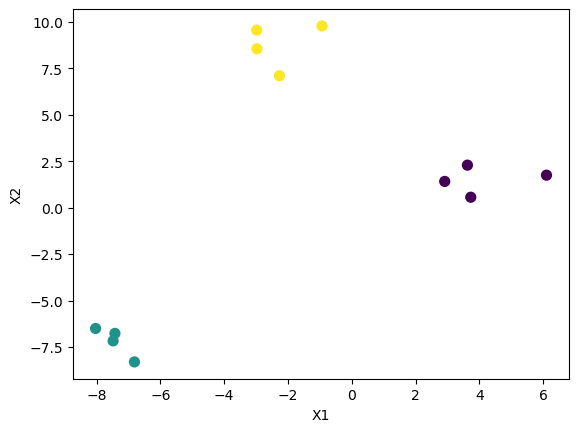

In [18]:
plt.scatter(X[:,0], X[:,1], s=50, c=labels, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [19]:
# what if we try a different k?
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(X)

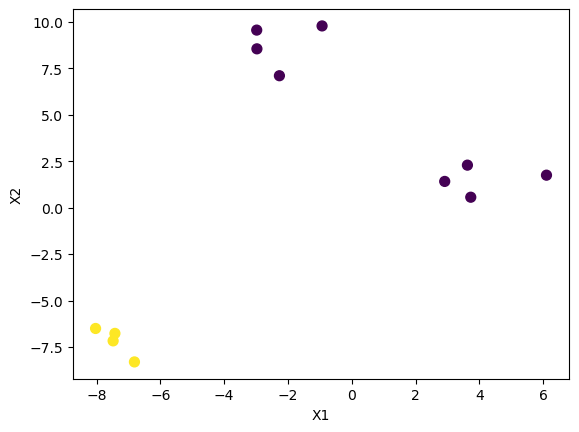

In [20]:
plt.scatter(X[:,0], X[:,1], s=50, c=labels, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [21]:
# # to help when writing your own function, here's one way of finding two points that are most similar
# test = np.random.rand(10, 2)

# from scipy.spatial.distance import pdist, squareform
# import numpy as np

# def closest_points(X):
#     """
#     Finds the indices of the two closest points in a matrix X by L2 norm.

#     Args:
#         X: 2D numpy array of shape (m, n)

#     Returns:
#         indices: List of two indices [i, j] of the closest points
#     """
#     # Compute pairwise distances
#     distances = squareform(pdist(X, 'euclidean'))

#     # Set diagonal to infinity to avoid self-pairing
#     np.fill_diagonal(distances, np.inf)

#     # Find the indices of the smallest distance
#     i, j = np.unravel_index(np.argmin(distances), distances.shape)

#     return [i, j]

# closest_points(test)

In [22]:
# # code your own
# def agglo(X, k):
#     '''
#         performs agglomerative clustering on X for a given k

#         Args:
#             X: the data matrix
#             k: the number of desired clusters

#         Returns:
#             agglo_dict: a dictionary with
#                 - labels: the final cluster labels
#                 - distortion: the distortion value for the final labels
#     '''



In [23]:
# agglo_test = agglo(X, 3)

In [24]:
# plt.scatter(X[:,0], X[:,1], s=50, c=agglo_test['labels'], cmap='viridis')
# plt.xlabel('X1')
# plt.ylabel('X2')
# plt.show()

In [25]:
# (if time) PCA Clustering
import plotly.express as px
import seaborn as sns
# use seaborn's penguin data set
df_penguins = sns.load_dataset('penguins')
# remove missing values
df_penguins.dropna(axis=0, inplace=True)
# standardize numeric columns
col_num_list = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feat in df_penguins.columns:
    if feat in col_num_list:
        df_penguins[f'{feat}'] = (df_penguins[feat] - df_penguins[feat].mean()) / df_penguins[feat].std()
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.894695,0.779559,-1.424608,-0.567621,Male
1,Adelie,Torgersen,-0.821552,0.119404,-1.067867,-0.505525,Female
2,Adelie,Torgersen,-0.675264,0.424091,-0.425733,-1.188572,Female
4,Adelie,Torgersen,-1.333559,1.084246,-0.568429,-0.940192,Female
5,Adelie,Torgersen,-0.858123,1.744400,-0.782474,-0.691811,Male


In [26]:
# perform PCA on the numeric features and recover the first 2 principal components
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = df_penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].to_numpy()

Xhat = pca.fit_transform(X)
Xhat[:5,:]

array([[-1.85080775,  0.03202119],
       [-1.31427621, -0.44286031],
       [-1.37453656, -0.16098821],
       [-1.88245548, -0.01233268],
       [-1.91709572,  0.81636958]])

In [27]:
# create the biplot with hover data to see if there are any clusters
hover_data_df = pd.DataFrame({
    'PC1': Xhat[:,0],
    'PC2': Xhat[:,1],
    'Species': df_penguins['species'],
    'Island': df_penguins['island'],
    'Sex': df_penguins['sex']
})

# try coloring by different categorical features
px.scatter(hover_data_df, x='PC1', y='PC2', color='Species', hover_data=['Species', 'Island', 'Sex'])